### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1533]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [1535]:
data = pd.read_csv('data/coupons.csv')

In [1536]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

First, I'll look to see what data type each column is, and what the total number of both rows and columns are in this dataframe.

In [1539]:
# Column data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [1540]:
# Number of rows and columns in the dataframe

data.shape

(12684, 26)

It appears that there are 12,684 rows in the dataframe to go along with the 26 columns. This will be informative in our decision of what to do in regards to any missing values. Now, let's see if there are any missing ("N/A") values.

In [1542]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

It appears that there are 6 columns with missing data - "car", "Bar", "CoffeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20to50". Of these, the latter 5 are all relatively low in terms of magnitude (all less than 250) and have to do with the number of times a customer visits a given type of restaurant (**per month, we will assume, since the data is unclear**). We will still decide what to do with these in a moment, but first let's dig more into the column with almost all of its data missing, "car". We'll take a look at what data is present in this column to begin with.

In [1545]:
data["car"].value_counts()

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64

It appears that this column contains values denoting the type of vehicle that a surveyor drives. Since counts in each of these categories are less than 30, it isn't likely that we'll be able to draw much significance out of comparing these categories to each other, or to any other facets of the dataset. In that way, it could make sense to drop the "car" column entirely given how few values it has relative to the other columns of the data set, however since it could be interesting to examine how those who can't use "Onstar" out of this subset ("Scooter and motorcycle", "do not drive", "Car that is too old to install Onstar :D" - a total of 64 samples) answer the survey relative to those who are able to install "Onstar" ("Mazda5", "crossover" - a total of 43 samples). Thus, what we can do is create a seperate dataset using just the data where the "cars" value is non-null, and then remove the "car" column from the main dataset we're going to use for analysis. Before we do that, though, let's continue exploring the nulls by looking at sample rows with columns "Bar", "CoffeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50" being null.

In [1547]:
data[data["Bar"].isnull()].head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
522,No Urgent Place,Alone,Sunny,55,10AM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
852,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
853,No Urgent Place,Partner,Sunny,80,10AM,Restaurant(20-50),1d,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
854,No Urgent Place,Partner,Sunny,80,10AM,Bar,2h,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
855,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Male,41,Married partner,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1


Visually examining the above sample data where "Bar" is null, it seems that there is a lot of overlap between one restaurant type column being null and another type being null. To get a better idea of how much data we would lose if we excluded the rows where restaurant types were null, let's count how many rows have at least one of the restaurant types as null and then find the percentage of data that is compared to the entire dataframe.

In [1549]:
# Number of rows with at least one restaurant-type column empty

data[data["Bar"].isnull() | data["CoffeeHouse"].isnull() | data["CarryAway"].isnull() | data["RestaurantLessThan20"].isnull() | data["Restaurant20To50"].isnull()].shape[0]

605

In [1550]:
# total number of rowns in dataframe

data.shape[0]

12684

In [1551]:
# Percentage of data lost if we take out all rows with at least one restaurant visit type null value

(data[data["Bar"].isnull() | data["CoffeeHouse"].isnull() | data["CarryAway"].isnull() | data["RestaurantLessThan20"].isnull() | data["Restaurant20To50"].isnull()].shape[0] * 100) / data.shape[0]

4.769788710186061

If we remove the rows described above, we would be losing less than 5% of the given data. Since the data has over 12,000 values with all columns completed (excluding the "car") column, we can determine it is appropriate to do the following:

1. Remove the above rows from the dataframe

2. Create a subset of the dataframe consisting of the data with the "cars" column filled out

3. Remove the "cars" column from the dataframe

A copy of the original dataframe will be kept just in case it is needed

In [1553]:
data_clean = data[data["Bar"].notnull() & data["CoffeeHouse"].notnull() & 
                  data["CarryAway"].notnull() & data["RestaurantLessThan20"].notnull() & 
                  data["Restaurant20To50"].notnull()]

data_cars_subset = data_clean[data_clean["car"].notnull()]

data_clean = data_clean.drop("car", axis = 1)


The following analyses will utilize the "data_clean" and / or "data_cars_subset" dataframes, unless otherwise specified.

4. What proportion of the total observations chose to accept the coupon? 



In [1556]:
(data_clean[data_clean["Y"] == 1].shape[0] / data_clean.shape[0]) * 100

56.93352098683666

Approximately 57% of the total observations chose to accept the coupon.

5. Use a bar plot to visualize the `coupon` column.

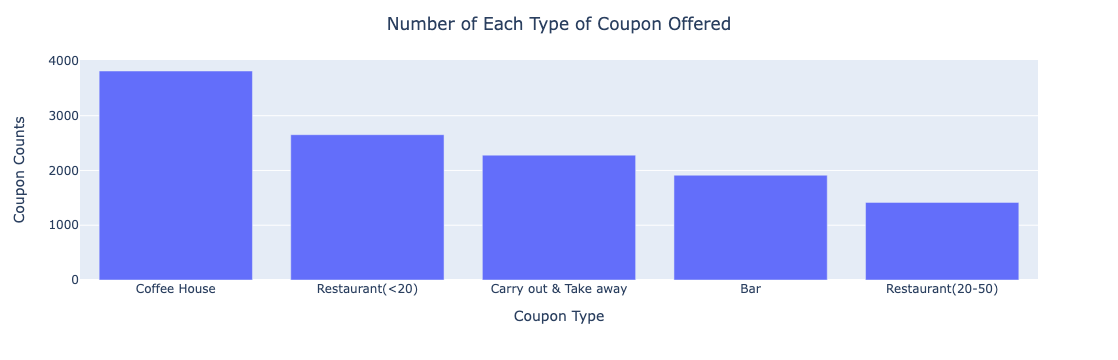

In [1559]:
coupon_column_barplot = px.bar(data_clean["coupon"].value_counts()).update_layout(xaxis_title = "Coupon Type", yaxis_title = "Coupon Counts", 
                                                                                  title = "Number of Each Type of Coupon Offered",
                                                                                  title_x = 0.5, showlegend = False)

coupon_column_barplot

The majority of coupons offered in the survey were for coffee houses at almost 4,000, followed by restaurants under 20 USD per person, carry out & take away, bars, and restaurants between 20 - 50 USD per person (~1,500).

6. Use a histogram to visualize the temperature column.

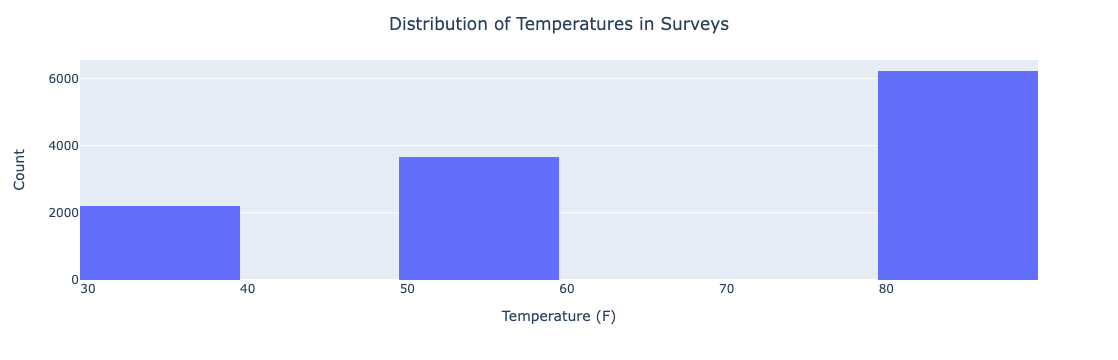

In [1562]:
px.histogram(data_clean["temperature"], nbins = 10).update_layout(xaxis_title = "Temperature (F)", yaxis_title = "Count", 
                                                                                  title = "Distribution of Temperatures in Surveys",
                                                                                  title_x = 0.5, showlegend = False)

Though the temperature column is integer data and so plotted on a histogram, the way to actually interpret this histogram is similar to how a bar plot would be interpreted. This is because there are only three possible values for temperature - 80, 55, and 30, effectively turning "temperature" into a categorical variable, not a numeric variable. Thus, we can see that there are just over 6,000 temperatures of 80 F, just over 3,500 temperatures of 55 F, and just over 2,000 temperatures of 30 F.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [1565]:
data_coupons_bar_subset = data_clean[data_clean["coupon"] == "Bar"]


2. What proportion of bar coupons were accepted?


In [1567]:
(data_coupons_bar_subset[data_coupons_bar_subset["Y"] == 1].shape[0] / data_coupons_bar_subset.shape[0]) * 100


41.19184526921067

Approximately 41.2% of bar coupons were accepted.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


First, let's confirm what the possible values are for the "Bar" column.

In [1571]:
data_coupons_bar_subset["Bar"].value_counts()

Bar
never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: count, dtype: int64

Based on the above, we want these catagories to capture those who go to the bar 3 times or fewer on average per month: "never", "less1", "1-3". We will want "4-8" and "gt8" for those who go to the bar more than 3 times per month on average.

Note: Here I'm using "-" vs. "~" since the latter is a special character in markdown

In [1573]:
# Acceptance rate for those who went to a bar 3 or fewer times a month on average

acceptance_bar_0_to_3 = data_coupons_bar_subset[(data_coupons_bar_subset["Bar"] == "never") | (data_coupons_bar_subset["Bar"] == "less1") | (data_coupons_bar_subset["Bar"] == "1~3")]

(acceptance_bar_0_to_3[acceptance_bar_0_to_3["Y"] == 1].shape[0] / acceptance_bar_0_to_3.shape[0]) * 100


37.26744186046512

Approximately 37.3% of those who go to the bar 3 times or fewer per month on average accepted bar coupons. Now, let's look at those who went more often.

In [1575]:
# Acceptance rate for those who went to a bar more than 3 times a month on average

acceptance_bar_4_or_more = data_coupons_bar_subset[(data_coupons_bar_subset["Bar"] == "4~8") | (data_coupons_bar_subset["Bar"] == "gt8")]

(acceptance_bar_4_or_more[acceptance_bar_4_or_more["Y"] == 1].shape[0] / acceptance_bar_4_or_more.shape[0]) * 100


76.16580310880829

Approximately 76.2% of those who go to the bar more than 3 times per month on average accepted bar coupons. **This is more than twice (2x) the acceptance rate of those who go to the bar 3 times per month or fewer on average (37.3%).**

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


First, let's get an understanding of what values we have in the age column.

In [1579]:
data_coupons_bar_subset["age"].value_counts()

age
21         397
26         368
31         324
50plus     273
36         196
41         171
46         103
below21     81
Name: count, dtype: int64

Based on the above, the only age group 25 or under is the "21" age group. All other age groups will be counted in the "older than 25" acceptance rate.

In [1581]:
# Acceptance rate for those who went to a bar more than more than once a month on average and are older than 25

acceptance_bar_1_25 = data_coupons_bar_subset[((data_coupons_bar_subset["Bar"] == "1~3") | (data_coupons_bar_subset["Bar"] == "4~8") | 
                                              (data_coupons_bar_subset["Bar"] == "gt8")) & (data_coupons_bar_subset["age"] != "21")]

(acceptance_bar_1_25[acceptance_bar_1_25["Y"] == 1].shape[0] / acceptance_bar_1_25.shape[0]) * 100

68.28087167070218

Approximately 68.3% of those who go to a bar more than once a month on average and are older than 25 accepted the coupon. Now, let's calculating the acceptance rate for the remaining group.

In [1583]:
# Find the indicies in the bar subset that are different from those (i.e., are complementary to) in the subset of the older than 25 population that goes to the bar more than once a month.

not_acceptance_bar_1_25 = data_coupons_bar_subset.loc[data_coupons_bar_subset.index.difference(acceptance_bar_1_25, sort = False)]

(not_acceptance_bar_1_25[not_acceptance_bar_1_25["Y"] == 1].shape[0] / not_acceptance_bar_1_25.shape[0]) * 100

41.19184526921067

The group that is not older than 25 and goes to the bar more than once a month on average consists of everyone 21 and younger and all those older than 25 that go to the bar less than one time a month on average. Approximately 41.2% of this latter population accepted the coupon, which is a significant drop compared to the former group (an approximately 27.1% difference). This suggests there is a difference in these two populations when it comes to accepting bar coupons. Also, the latter group accepted bar coupons at a rate similar to the overall population. **This suggests there is a difference between the former group and the overall population when it comes to accepting bar coupons.**

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


First, let's see what possible values we have for passengers.

In [1587]:
data_coupons_bar_subset["passanger"].value_counts()

passanger
Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: count, dtype: int64

Based on the above, the only "kid-related" category is "Kid(s)", so this - along with "Alone", since the question specifies that there is indeed a passanger - is the only one that would be excluded from the population described above. Similarly, let's see what options we have for occupations.

In [1589]:
data_coupons_bar_subset["occupation"].value_counts()

occupation
Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Phys

There are a lot of occupations here. Rather than including all of these, we will focus on excluding "Farming Fishing & Forestry", which turns out to be a singular category, not three seperate ones.

In [1591]:
# Create a subset with the population defined above

question_5_positive = data_coupons_bar_subset[(data_coupons_bar_subset["Bar"].isin(["1~3", "4~8", "gt8"])) &
                                              (data_coupons_bar_subset["passanger"].isin(["Friend(s)", "Partner"])) &
                                              (data_coupons_bar_subset["occupation"] != "Farming Fishing & Forestry")]


# Calculate percentage who accepted the bar coupon

(question_5_positive[question_5_positive["Y"] == 1].shape[0] / question_5_positive.shape[0]) * 100

71.42857142857143

Approximately 71.44% of drivers who go to the bar more than once a month on average, did not have kids in the car, and had an occupation that was not "Farming Finish & Forestry" accepted the bar coupon. Now, let's look at the opposite / complementary population.

In [1593]:
# Find the indicies in the bar subset that are different from those (i.e., are complementary to) the subset described in this problem

question_5_negative = data_coupons_bar_subset.loc[data_coupons_bar_subset.index.difference(question_5_positive, sort = False)]


# Calculate percentage who accepted the bar coupon

(question_5_negative[question_5_negative["Y"] == 1].shape[0] / question_5_negative.shape[0]) * 100

41.19184526921067

This latter group accepted bar coupons at a rate similar to the overall population - approximately 41.2%, and more than 30% lower than the rate of acceptance for the former group (approximately 71.4%). **This suggests there is a difference between the overall population and drivers who: go to the bar more than once a month on average, have a passanger that's not a kid, and had an occupation that was not "Farming Fishing & Forestry" in terms of bar coupon acceptance rate.**

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



First, let's see what possible values we have for marital status.

In [1597]:
data_coupons_bar_subset["maritalStatus"].value_counts()

maritalStatus
Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: count, dtype: int64

Based on the above, we will exclude the "Widowed" category from the first population. Now let's see what values we have for income.

In [1599]:
data_coupons_bar_subset["income"].value_counts()

income
$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: count, dtype: int64

The categories that fall under "less than 50k" are: "Less than USD 12500", "USD 12500 - USD 24999", "USD 25000 - USD 37499", and "USD 37500 - USD 49999". I used USD instead of "$" since two of the latter constitude a special setting in Markdown. Next, let's create the initial population and calculate the proportion of bar coupon acceptances.

In [1601]:
# Create a subset with the population defined above

question_6_positive = data_coupons_bar_subset[((data_coupons_bar_subset["Bar"].isin(["1~3", "4~8", "gt8"])) & 
                                               (data_coupons_bar_subset["passanger"].isin(["Friend(s)", "Partner"])) &
                                               (data_coupons_bar_subset["maritalStatus"] != "Widowed")) |

                                              ((data_coupons_bar_subset["Bar"].isin(["1~3", "4~8", "gt8"])) &
                                               (data_coupons_bar_subset["age"].isin(["below21", "21", "26"]))) |

                                              ((data_coupons_bar_subset["RestaurantLessThan20"].isin(["4~8", "gt8"])) &
                                               (data_coupons_bar_subset["income"].isin(["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"])))]


# Calculate percentage who accepted the bar coupon

(question_6_positive[question_6_positive["Y"] == 1].shape[0] / question_6_positive.shape[0]) * 100

56.69291338582677

Approximately 56.7% of the population described in this question accepted the bar coupon. Now, let's look at the opposite / complementary population.

In [1603]:
# Find the indicies in the bar subset that are different from those (i.e., are complementary to) the subset described in this problem

question_6_negative = data_coupons_bar_subset.loc[data_coupons_bar_subset.index.difference(question_6_positive, sort = False)]


# Calculate percentage who accepted the bar coupon

(question_6_negative[question_6_negative["Y"] == 1].shape[0] / question_6_negative.shape[0]) * 100

41.19184526921067

This latter group accepted bar coupons at a rate similar to the overall population - approximately 41.2%, and more than 15% lower than the rate of acceptance for the former group (approximately 56.7%). **This suggests there is a difference between the overall population and drivers who fit at least one of the three sets of criteria described in this question.**

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

**Based on the above obeservations, I hypothesize the following about drivers who accepted the bar coupons:**

1. Drivers will accept bar coupons less than half the time overall (41.2%).

2. Drivers who go to the bar on average more than 3 times per month will accept bar coupons at more than twice the rate (76.2%) of drivers who don't (37.3%).

3. Drivers older than 25 who go to the bar on average more than once a month will accept bar coupons at a much higher rate (~68.3%) than the overall population of drivers (41.2%).

4. Drivers who go to the bar more than once a month on average, have a passanger that's not a kid, and have an occupation outside of farming, fishing, and forestry will accept bar coupons at a much higher rate (71.4%) than the overall population (41.2%).


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

To select another coupon group, let's first examine again what all the coupon groups are.

In [1609]:
data_clean["coupon"].value_counts()

coupon
Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: count, dtype: int64

Aside from "Bar", we have the following coupon types: "Coffee House", "Restaurant(<20)", "Carry out & Take away", and "Restaurant(20-50)". 

**For our second coupon group to explore, we'll pick "Carry out & Take away". Theoretically these should have relatively high rates of acceptance given that they are the least time committment for drivers of all the coupons, so let's see if this holds true and which sub-groups have the highest rates of acceptance.**

First, we'll create a new DataFrame that contains just the "Carry out & Take away" (COTA) coupons.

In [1612]:
data_coupons_cota_subset = data_clean[data_clean["coupon"] == "Carry out & Take away"]

Now, let's see what percentage of COTA coupons were accepted overall.

In [1708]:
(data_coupons_cota_subset[data_coupons_cota_subset["Y"] == 1].shape[0] / data_coupons_cota_subset.shape[0]) * 100


73.7719298245614

**Approximately 73.8% of COTA coupons were accepted. This is significantly more (by ~32.6%) than the overall percentage of bar coupons accepted (41.2%), supporting our initial theory that COTA coupons should have relatively high acceptance rates.**

Let's see if this distribution varies based on how often customers get carry out and take away on an average monthly basis. We'll start by reminding ourselves of the categories in the "Carry out & Take away" column. We'll get these counts and turn them into a dataframe for later use.

In [1617]:
cota_freq_counts = pd.DataFrame(data_coupons_cota_subset["CarryAway"].value_counts()).rename(columns = {"count" : "Counts"})

cota_freq_counts

,Counts
CarryAway,
1~3,830
4~8,783
less1,343
gt8,296
never,28


Now, let's get these same counts as a dataframe, except this time also grouped by acceptance.

In [1619]:
cota_freq_counts_acceptance = pd.DataFrame(data_coupons_cota_subset.groupby(["CarryAway", "Y"])[["CarryAway"]].count()).rename(columns = {"CarryAway" : "Counts"})

cota_freq_counts_acceptance

Counts
CarryAway Y        
1~3       0     216
          1     614
4~8       0     193
          1     590
gt8       0      73
          1     223
less1     0     110
          1     233
never     0       6
          1      22

Dividing the latter dataframe by the former will give us the proportions of acceptance for each frequency category. We'll turn this into a percentage, and plot it.

/var/folders/ds/_7c13n2x29586spp243zkhym0000gp/T/ipykernel_69476/2948930048.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



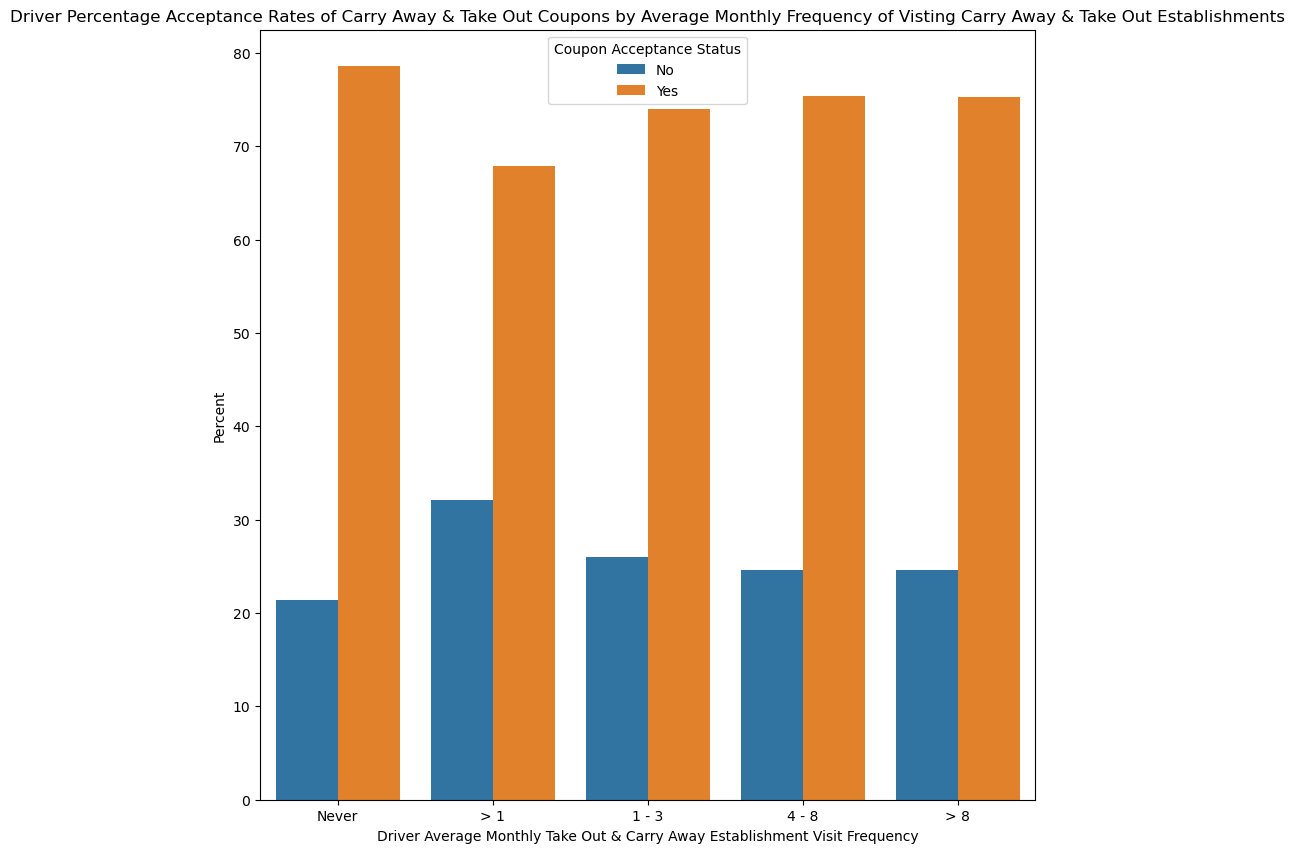

In [1621]:
#Increase the size of the plot

plt.subplots(figsize = (10, 10))

cota_frequency_acceptance_percentage = (cota_freq_counts_acceptance / cota_freq_counts) * 100

cota_frequency_acceptance_percentage = cota_frequency_acceptance_percentage.reset_index()

cota_frequency_acceptance_percentage.columns = ["CarryAway", "Coupon Acceptance Status", "Counts"]

# For clarity, in the "Coupon Acceptance Status Column change 0 to No and 1 to Yes"

cota_frequency_acceptance_percentage["Coupon Acceptance Status"] = cota_frequency_acceptance_percentage["Coupon Acceptance Status"].map({0: "No", 1 : "Yes"})


# Plot

freq_acceptance_percent_plot = sns.barplot(cota_frequency_acceptance_percentage, x = "CarryAway", y = "Counts", hue = "Coupon Acceptance Status", order = ["never", "less1", "1~3", "4~8", "gt8"])


freq_acceptance_percent_plot.set(xlabel = "Driver Average Monthly Take Out & Carry Away Establishment Visit Frequency", ylabel = "Percent", 
                                 title = "Driver Percentage Acceptance Rates of Carry Away & Take Out Coupons by Average Monthly Frequency of Visting Carry Away & Take Out Establishments")


# Relabel x-axis ticks for clarity

freq_acceptance_percent_plot.set_xticklabels(["Never", "> 1", "1 - 3", "4 - 8", "> 8"])


plt.show()


Percentage COTA coupon acceptance rate increases as average visit frequency to COTA establishments increases, for the < 1 to 8 range. Acceptance rate for a > 8 visit frequency is similar to the 4 - 8 visit frequency, **indicating that COTA coupon acceptance rate plateaus for drivers after 4 - 8 average visits**. Interestingly, however, **the highest acceptance rate (of nearly 80%) of COTA coupons belongs to drivers who on average never visit COTA establishments each month**, which is somewhat counterintuitive. Perhaps it's the case that some of these drivers only weren't going to COTA establishments due to cost prohibition, which a coupon helped mitigate. This would be an interesting follow-up survey, and in either case this **indicates that it is very much worth targeting the population who never visits COTA establishments with COTA coupons.**

Now let's explore how other variables affect COTA coupon acceptance, such as income, kids, and direction.

Since COTA establishments tend to be lower cost than other restaurant options, we could hypothesize that those with lower incomes will frequent those establishments more, and therefore would be more likely to accept coupons for them. Let's seet if this is true by creating a similar plot to above, except this time looking at income levels.

In [1625]:
# Looking at income category options

data_coupons_cota_subset["income"].value_counts()

income
$25000 - $37499     364
$12500 - $24999     322
$37500 - $49999     318
$100000 or More     315
$50000 - $62499     279
Less than $12500    207
$87500 - $99999     160
$75000 - $87499     158
$62500 - $74999     157
Name: count, dtype: int64

In [1626]:
# Getting total counts by income level

cota_inc_counts = pd.DataFrame(data_coupons_cota_subset[["income"]].value_counts()).rename(columns = {"count" : "Counts"})

cota_inc_counts

,Counts
income,
$25000 - $37499,364
$12500 - $24999,322
$37500 - $49999,318
$100000 or More,315
$50000 - $62499,279
Less than $12500,207
$87500 - $99999,160
$75000 - $87499,158
$62500 - $74999,157


In [1627]:
# Get income counts by acceptance of COTA coupon

cota_inc_counts_acceptance = pd.DataFrame(data_coupons_cota_subset.groupby(["income", "Y"])[["income"]].count()).rename(columns = {"income" : "Counts"})

cota_inc_counts_acceptance

Counts
income           Y        
$100000 or More  0      95
                 1     220
$12500 - $24999  0      79
                 1     243
$25000 - $37499  0      79
                 1     285
$37500 - $49999  0      89
                 1     229
$50000 - $62499  0      63
                 1     216
$62500 - $74999  0      43
                 1     114
$75000 - $87499  0      52
                 1     106
$87500 - $99999  0      46
                 1     114
Less than $12500 0      52
                 1     155

/var/folders/ds/_7c13n2x29586spp243zkhym0000gp/T/ipykernel_69476/1067461211.py:31: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



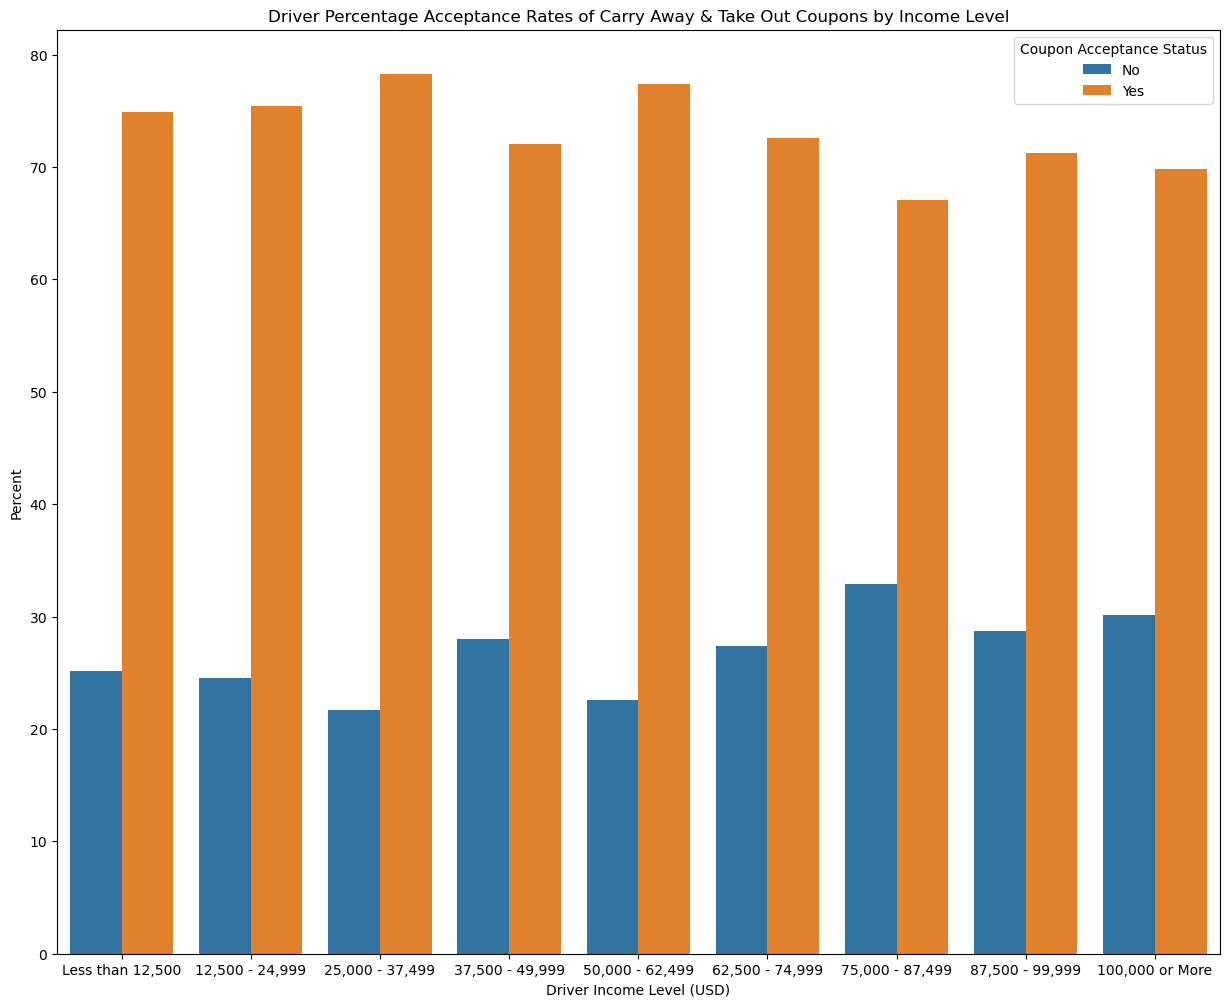

In [1770]:
# Plot percentages

#Increase the size of the plot

plt.subplots(figsize = (15, 12))

cota_inc_acceptance_percentage = (cota_inc_counts_acceptance / cota_inc_counts) * 100

cota_inc_acceptance_percentage = cota_inc_acceptance_percentage.reset_index()

cota_inc_acceptance_percentage.columns = ["income", "Coupon Acceptance Status", "Counts"]

# For clarity, in the "Coupon Acceptance Status Column change 0 to No and 1 to Yes"

cota_inc_acceptance_percentage["Coupon Acceptance Status"] = cota_inc_acceptance_percentage["Coupon Acceptance Status"].map({0: "No", 1 : "Yes"})


# Plot

inc_acceptance_percent_plot = sns.barplot(cota_inc_acceptance_percentage, x = "income", y = "Counts", hue = "Coupon Acceptance Status",
                                          order = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999", 
                                                   "$50000 - $62499", "$62500 - $74999", "$75000 - $87499", "$87500 - $99999", "$100000 or More"])


inc_acceptance_percent_plot.set(xlabel = "Driver Income Level (USD)", ylabel = "Percent", 
                                title = "Driver Percentage Acceptance Rates of Carry Away & Take Out Coupons by Income Level")


# Relabel x-axis ticks for clarity

inc_acceptance_percent_plot.set_xticklabels(["Less than 12,500", "12,500 - 24,999", "25,000 - 37,499", "37,500 - 49,999", 
                                              "50,000 - 62,499", "62,500 - 74,999", "75,000 - 87,499", "87,500 - 99,999", "100,000 or More"])


plt.show()


While there is not the linear decrease we hypothesized between these groups, there does seem to be an overall trend downwards in terms of COTA coupon acceptance as income level increases. Specifically, it looks like those drivers in income ranges Less than 12,500 to 37,499 USD have the highest rates of acceptance. These rates then decrease for drivers in the 37,500 - 74,999 USD income levels, and then are the overall lowest for drivers with income levels of 75,000 USD or more. The lowest acceptance rate is for drivers between 75,000 - 87,499 USD, and the highest acceptance rate is for drivers between 25,000 - 37,499 USD. **Overall, this analysis indicates that while drivers of all income levels have at least a 65% acceptance rate for COTA coupons, the biggest target audience would be those below 37,500 USD income level.** 

On a side note, it's worth noting that this data seems to just looks at the driver's income. It's unclear if it takes into account the income of any partner or spouse, the presence of children (increased overall family expenditure), etc. It's possible these or other scenarios may be accounting for the non-linear trend.

Now let's see how direction and having a kid in the car may have affected acceptance rates of COTA coupons (or, can a child in the car influence a change in direction?). First, a reminder of what values we have in the "passanger" column.

In [1631]:
# Looking at distance category options

data_coupons_cota_subset["passanger"].value_counts()



passanger
Alone        1339
Friend(s)     707
Kid(s)        142
Partner        92
Name: count, dtype: int64

For direction, we have two columns - one that tracks same direction, and one that tracks opposite direction. Since these are inverses of each other, we can effectively use either one. Here, we'll pick the same direction.

In [1633]:
data_coupons_cota_subset["direction_same"].value_counts()

direction_same
0    1522
1     758
Name: count, dtype: int64

1 means the direction of the establishment on the coupon is the same as the direction the driver is going, and 0 means the establishment is in the opposite direction.

In [1635]:
# Getting total counts by passanger type, direction

cota_dir_pass_counts = pd.DataFrame(data_coupons_cota_subset[["passanger", "direction_same"]].value_counts()).rename(columns = {"count" : "Counts"})

cota_dir_pass_counts

Counts
passanger direction_same        
Alone     1                  731
Friend(s) 0                  707
Alone     0                  608
Kid(s)    0                  142
Partner   0                   65
          1                   27

We see here that when it comes to having kids in the car and receving a COTA coupon, the establishment recieved for is only ever in the opposite direction. Since we have no same direction to compare it to, we will modify our question slightly - Does having a kid in the car and needing to go in the opposite direction result in a lower acceptance rate of COTA coupons as compared to the rest of the population? 

First, we create a further subset of the data with just kid passangers. Since all rows have a direction filled out, and all kid passengers are associated with opposite directions, we can ignore the direction parameter when creating this subset.

In [1702]:
data_coupons_cota_subset_kids = data_coupons_cota_subset[data_coupons_cota_subset["passanger"] == "Kid(s)"]

data_coupons_cota_subset_kids.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
74,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
140,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,26,Married partner,...,less1,gt8,4~8,never,1,1,0,0,1,1
267,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,31,Married partner,...,less1,1~3,less1,less1,1,1,0,0,1,0
289,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,41,Divorced,...,gt8,less1,1~3,never,1,1,0,0,1,0
309,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Male,41,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,0


Now, let's caculate the percentage acceptance.

In [1712]:
(data_coupons_cota_subset_kids[data_coupons_cota_subset_kids["Y"] == 1].shape[0] / data_coupons_cota_subset_kids.shape[0]) * 100


69.71830985915493

The percentage of drivers who accept COTA coupons when travelling in the opposite direction with a kid in the car is approximately 69.7%.

Now, let's run the same analysis for the complementary population who recieved a COTA coupon.

In [1719]:
# Find the indicies different from those (i.e., are complementary to) the subset above

data_coupons_cota_subset_nokids = data_coupons_cota_subset.loc[data_coupons_cota_subset.index.difference(data_coupons_cota_subset_kids, sort = False)]


# Calculate percentage who accepted the COTA coupon

(data_coupons_cota_subset_nokids[data_coupons_cota_subset_nokids["Y"] == 1].shape[0] / data_coupons_cota_subset_nokids.shape[0]) * 100

73.7719298245614

The complementary population accepts COTA coupons at the same rate as the overall population - 73.8%. This is 4.1% higher than the acceptance rate of the population of drivers with kids in the car and moving in the opposite direction. **So, it seems that drivers with kids in the car and travelling in the opposite direction of a COTA coupon's establishment are slightly less likely to accept that COTA coupon than the general population. It is not that much less likely, however, so they still seem to be a good population to target.**

Finally, let's see how age affects COTA coupon acceptance rate.

In [1727]:
# Checking age categories

data_coupons_cota_subset["age"].value_counts()

age
21         466
26         441
31         370
50plus     335
36         239
41         204
46         121
below21    104
Name: count, dtype: int64

In [1733]:
# Get age counts

cota_age_counts = pd.DataFrame(data_coupons_cota_subset["age"].value_counts()).rename(columns = {"count" : "Counts"})

cota_age_counts

,Counts
age,
21,466
26,441
31,370
50plus,335
36,239
41,204
46,121
below21,104


In [1747]:
# Get age counts by acceptance of COTA coupon

cota_age_counts_acceptance = pd.DataFrame(data_coupons_cota_subset.groupby(["age", "Y"])[["age"]].count()).rename(columns = {"age" : "Counts"})

cota_age_counts_acceptance

Counts
age     Y        
21      0     121
        1     345
26      0     117
        1     324
31      0     104
        1     266
36      0      61
        1     178
41      0      55
        1     149
46      0      34
        1      87
50plus  0      77
        1     258
below21 0      29
        1      75

/var/folders/ds/_7c13n2x29586spp243zkhym0000gp/T/ipykernel_69476/2463919155.py:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



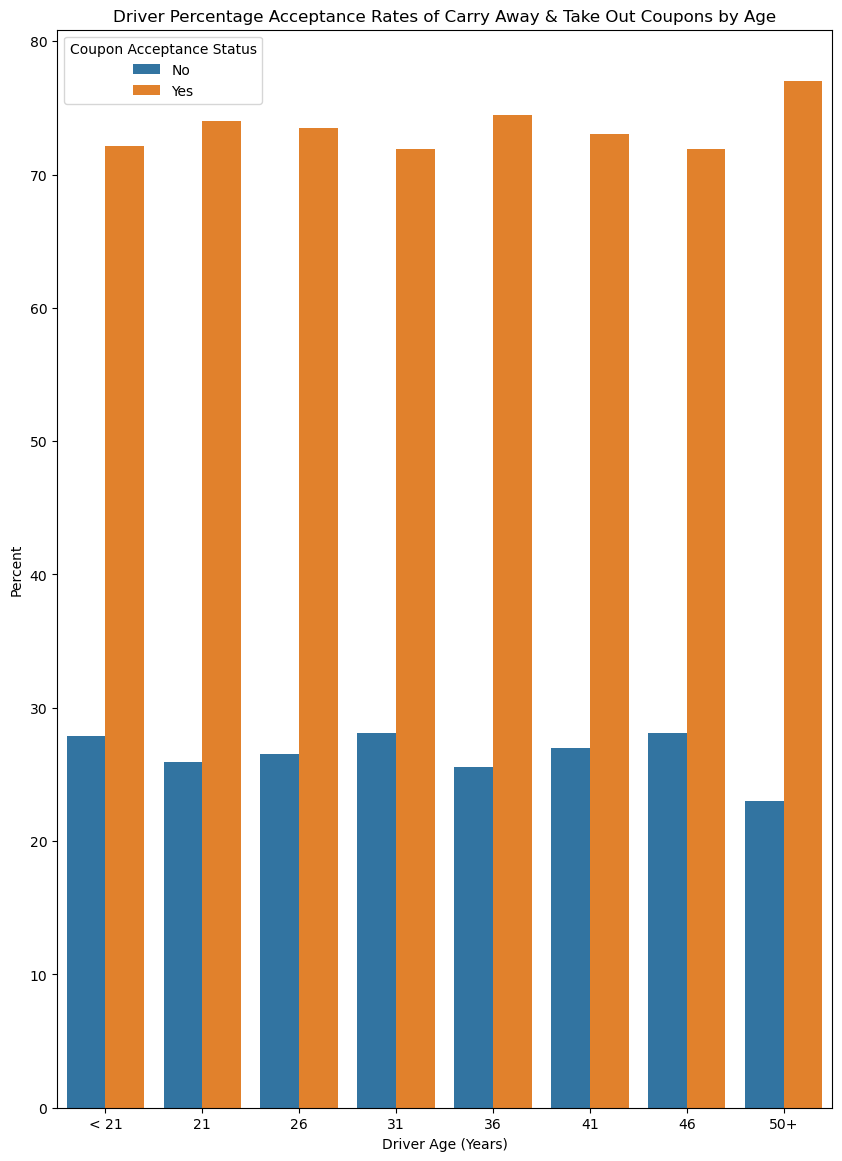

In [1768]:
# Increase the size of the plot

plt.subplots(figsize = (10, 14))

cota_age_acceptance_percentage = (cota_age_counts_acceptance / cota_age_counts) * 100

cota_age_acceptance_percentage = cota_age_acceptance_percentage.reset_index()

cota_age_acceptance_percentage.columns = ["Age", "Coupon Acceptance Status", "Counts"]

# For clarity, in the "Coupon Acceptance Status Column change 0 to No and 1 to Yes"

cota_age_acceptance_percentage["Coupon Acceptance Status"] = cota_age_acceptance_percentage["Coupon Acceptance Status"].map({0: "No", 1 : "Yes"})


# Plot

age_acceptance_percent_plot = sns.barplot(cota_age_acceptance_percentage, x = "Age", y = "Counts", hue = "Coupon Acceptance Status", order = ["below21", "21", "26", "31", "36", "41", "46", "50plus"])


age_acceptance_percent_plot.set(xlabel = "Driver Age (Years)", ylabel = "Percent", 
                                title = "Driver Percentage Acceptance Rates of Carry Away & Take Out Coupons by Age")


# Relabel x-axis ticks for clarity

age_acceptance_percent_plot.set_xticklabels(["< 21", "21", "26", "31", "36", "41", "46", "50+"])


plt.show()

There does not seem to be a clear pattern of the affect of age on COTA coupon acceptance rates, however it is worth noting that the 50+ age group seems to have a higher acceptance rate than the rest. Lets find what this is specifically.

In [1783]:
data_coupons_cota_subset_50plus = data_coupons_cota_subset[data_coupons_cota_subset["age"] == "50plus"]

(data_coupons_cota_subset_50plus[data_coupons_cota_subset_50plus["Y"] == 1].shape[0] / data_coupons_cota_subset_50plus.shape[0]) * 100


77.01492537313432

**The 50+ age group accepts Carry out & Take away coupons at a rate of approximately 77.0%, which is ~3.2% higher than the rate the overall driver population accepts these coupons at (73.8%).**